## LogLoss

### Домашнее задание


1) Измените функцию predict(w, X) так, чтобы можно было подать порог для классификации.

2) Подберите аргументы функции optimize для логистической регрессии таким образом, чтобы log loss был минимальным.

3) Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

4) Постройте кривую обучения (значение оценки потерь от итерации) для примеров из тренировочной и тестовой выборки. Оцените результаты и сделайте выводы.

5) Попробуйте ответить на вопросы: Могла ли модель переобучиться? На каком шаге это произошло? Почему?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
def loss_function(x):
    return 0 if x > 0 else 1

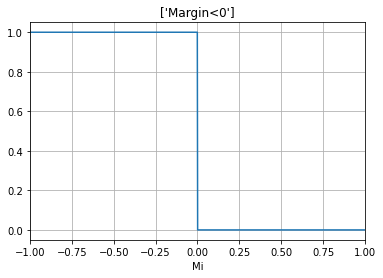

In [3]:
dots = np.linspace(-1, 1, 1000)
q_zero_one_loss = [loss_function(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.plot(dots, q_zero_one_loss)
plt.grid(True)
plt.title(['Margin<0'])
plt.show()

In [4]:
def exp_loss_func(x):
    return np.exp(-x)

In [5]:
def square_loss(x):
    return (1 - x) ** 2

In [6]:
def logistic_loss(x):
    return np.log2(1 + np.exp(-x))

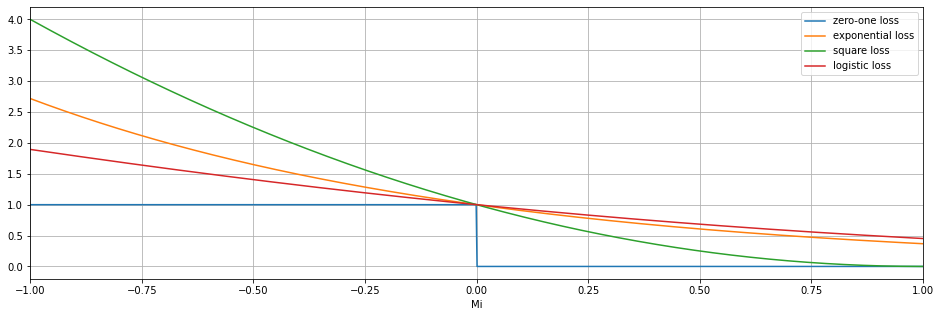

In [7]:
q_exp_loss = [exp_loss_func(x) for x in dots]
q_logistic_loss = [logistic_loss(x) for x in dots]
q_square_loss = [square_loss(x) for x in dots]

plt.figure(figsize = (16,5))
plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.plot(dots, q_zero_one_loss)
plt.plot(dots, q_exp_loss)
plt.plot(dots, q_square_loss)
plt.plot(dots, q_logistic_loss)
plt.grid(True)
plt.legend(['zero-one loss', 'exponential loss', 'square loss', 'logistic loss'])
plt.show()

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

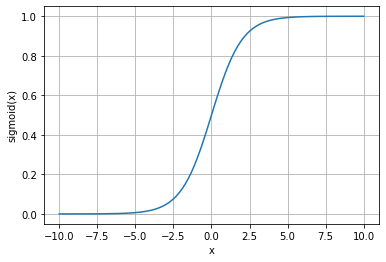

In [9]:
dots = np.linspace(-10, 10, 100)
sigmoid_value = list(map(sigmoid, dots))

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.plot(dots, sigmoid_value)
plt.show()

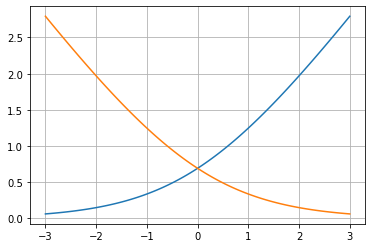

In [10]:
x = np.linspace(-3,3,100)
w = 0.91

plt.plot(x,-np.log(1/(1+np.exp(x *w))))
plt.plot(x,-np.log((1-1/(1+np.exp(x * w)))))
plt.grid()
plt.show()

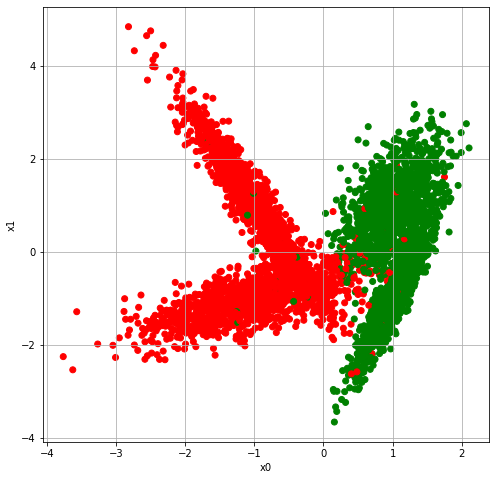

In [11]:
# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=5000, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=110)
# 

#classes = datasets.make_blobs(n_samples=1000,centers = 2, cluster_std = 1., random_state=12)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue','green'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [12]:
# перемешивание датасета
np.random.seed(120)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index,:], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.9
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (4500, 2)
Размер массива признаков тестовой выборки (500, 2)
Размер массива ответов для обучающей выборки (4500,)
Размер массива ответов для тестовой выборки (500,)


In [13]:
 y_test[:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [14]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [15]:
def log_loss(w, X, y):
    m = X.shape[1]
    

    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X))
    
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
    return loss, grad

In [16]:
def optimize(w, X, y, n_iterations, eta):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    X = np.vstack((np.ones((1,X.shape[1])),X))
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

In [20]:
probability = float(input('За порог отнесения к тому или иному классу примем вероятность: ' )) #пункт 1


def predict(w, X):
    
    m = X.shape[1]
    X = np.vstack((np.ones((1,X.shape[1])),X))
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > probability): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= probability):
            y_predicted[:, i] = 0
    
    return y_predicted

За порог отнесения к тому или иному классу примем вероятность: 0.5


In [49]:
# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0]+1, 1))+0.1
n_iterations = 3000
eta = 0.2

w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[-1.19798045]
 [ 5.50966146]
 [ 0.10637631]]
Точность на обучающей выборке: 97.533
Точность на тестовой выборке: 97.200


In [ ]:
# Пункт 2:
# Исходный вариант:
# w0 = np.zeros((X_train_tr.shape[0]+1, 1))+0.1
# n_iterations = 3000
# eta = 0.2

# Результат:
# Итоговый вектор весов w: [[-0.21638412]
#  [ 2.86347759]
#  [ 0.09292863]]
# Точность на обучающей выборке: 96.956
# Точность на тестовой выборке: 96.200

# Изменим аргументы ф-ии optimize:
# n_iterations = 500
# eta = 0.05    

# Результат:
# Итоговый вектор весов w: [[-1.19798045]
#  [ 5.50966146]
#  [ 0.10637631]]
# Точность на обучающей выборке: 97.533
# Точность на тестовой выборке: 97.200


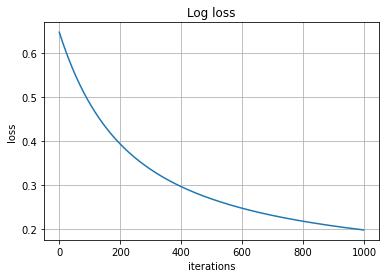

In [24]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')

plt.plot(range(len(losses)), losses)
plt.grid()
plt.show()

In [ ]:
xl = np.array([[1,1],[-2,2],[-2,2]]) * 0.9

yt = np.dot(w.T, xl)

In [ ]:
yt

In [ ]:
colors = ListedColormap(['red', 'blue','green'])
y_x = predict(w, classes[0].T)
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.grid()
plt.title('True y')
plt.xlabel('x0')
plt.ylabel('x1')
plt.subplot(1,2,2)
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=y_x.reshape(-1), cmap=colors)
plt.grid()
plt.title('Predict y')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [50]:
# Пункт 3:

#### Accuracy (точность)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


Точность классификатора логистической регрессии для тестового набора: 0,97

#### Матрица ошибок

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[245  12]
 [  2 241]]


Результат показывает, что у нас 245+241 верных прогнозов и 2+12 ошибочных.

#### Вычисление точности, полноты, F-меры и поддержки

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       257
           1       0.95      0.99      0.97       243

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

